In [24]:
import csv
import pickle

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Load data

In [2]:
with open('./data/training_x.dat', 'rb') as pickleFile:
     x_tr = pickle.load(pickleFile)
with open('./data/training_y.dat', 'rb') as pickleFile:
     y_tr = pickle.load(pickleFile)
with open('./data/validation_x.dat', 'rb') as pickleFile:
     x_val = pickle.load(pickleFile)

### Inspect data

In [71]:
print("x_tr:")
print(type(x_tr))
print(len(x_tr))
print(x_tr[0].shape)
print(type(x_tr[0]))

print("y_tr:")
print(type(y_tr))
print(y_tr[0:10])

num_imgs_tr = len(y_tr)
num_imgs_val = len(x_val)
print(num_imgs_val)

x_tr:
<class 'list'>
1281167
(8, 8, 3)
<class 'numpy.ndarray'>
y_tr:
<class 'list'>
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
48238


### Get 1000 images and reshape

In [ ]:
x_tr_1000 = np.asarray(x_tr[0:1000]).reshape(1000, 64, 3)[:, :, 0]
y_tr_1000 = np.asarray(y_tr[0:1000])
x_val_1000 = np.asarray(x_val[0:1000]).reshape(1000, 64, 3)[:, :, 0]

### Is data all allright?

In [4]:
correct_shape = x_val[0].shape
print(correct_shape)

(8, 8, 3)


In [5]:
for i, data in enumerate(x_tr):
    if data.shape != correct_shape:
        print(":D", i, "in x_tr")
        print(data.shape)
        
for i, data in enumerate(x_val):
    if data.shape != correct_shape:
        print(":D", i, "in x_val")
        print(data.shape)

:D 216805 in x_tr
(8, 8, 4)


-> No, its not <br>
-> Make it all allright

In [6]:
x_tr[216805] = x_tr[216805][:, :, 0:3]
print(x_tr[216805].shape)

(8, 8, 3)


### Reshape all

In [7]:
x_tr_reshaped = np.asarray(x_tr).reshape(num_imgs_tr, 64, 3)[:, :, 0]
y_tr_reshaped = np.asarray(y_tr)
x_val_reshaped = np.asarray(x_val).reshape(num_imgs_val, 64, 3)[:, :, 0]

### train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_tr_reshaped, y_tr_reshaped, test_size=0.33, random_state=42)
X_test_1000 = X_test[:1000]
y_test_1000 = y_test[:1000]

### Fit and predict, cross validation

In [68]:
model = KNeighborsClassifier(n_neighbors=5,algorithm='auto')
model.fit(X_train, y_train)

KNeighborsClassifier()

In [69]:
y_pred_1000 = model.predict(X_test_1000)

In [17]:
def accuracy(prediction, validation):
    correct = 0
    for i, predicted in enumerate(prediction):
        if predicted == validation[i]:
            correct += 1
            
    return correct/len(prediction)

In [64]:
print(accuracy(y_pred_1000, y_test_1000))
accuracies = [0.015, 0.013, 0.014, 0.014, 0.015, 0.012, 0.010, 0.011, 0.012, 0.011, 0.012]

0.014


### elbow chart

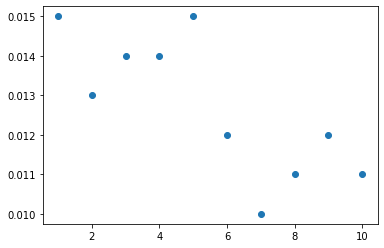

In [54]:
plt.scatter(list(range(1, len(accuracies)+1)), accuracies)

### To csv

In [70]:
with open('predictions01_1000.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['Id,Class'])
    for i, predicted_class in enumerate(y_pred_1000):
        writer.writerow([i+1, predicted_class])